## Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import strptime
import datetime
from datetime import datetime
import math
import warnings
warnings.filterwarnings('ignore')
import time
import csv
import glob
import logging
import importlib
import tweets_utils
import json
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import re
from operator import itemgetter
import matplotlib.cm as mcm
import community
from community import community_louvain as cm
import leidenalg as la
import igraph as ig
from cdlib import algorithms
import plotly.express as px
%autosave 3600

Autosaving every 3600 seconds


## Indice
- [Utils](#utils)
- [CCDH and tweets process](#ccdh)
- [Process CCDH data](#Process_CCDH_data)
- [New files](#new)
- [Total stats](#stats) 
- [Stats disinform](#stats_disinform)
- [New domain study](#new_urls)
- [Credibility](#credibility)
- [Date tweets](#dates)
- [Network](#network)
- [Botometer score](#botometer_score)

## Utils
<a id="utils"/>

In [3]:
path = "C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/csv/"
users_link = glob.glob(path + "users_ccdh.csv")
users_disinform = pd.read_csv(users_link[0])
users_disinform

,screen_name,status
0,mercola,active
1,RobertKennedyJr,active
2,BusyDrT,suspended
3,DrButtar,active
4,unhealthytruth,active
5,DrChrisNorthrup,active
6,DrBenTapper1,suspended
7,kevdjenkins1,active


In [4]:
def found(name, list_name=users_disinform["screen_name"]):
    for i in list_name:
        if(name == i):
            return True
    return False

In [6]:
path = "C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/csv/"
credibility_url = pd.read_csv(path + "domain_credibility.csv")
credibility_url

,Domain,Class
0,100percentfedup.com,low
1,100percentfedup.com,high
2,10news.one,low
3,12minutos.com,low
4,12news.com,high
...,...,...
820,childrenshealthdefense.org,low
821,"AdvancedMedicineConference.com,",low
822,aol.com,high
823,trendingpolitics.com,low


## CCDH Research
<a id="ccdh"/>

### Process CCDH data
<a id="Process_CCDH_data"/>

In [7]:
path = "C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/csv/"
disinform = pd.read_csv(path + "disinformation_users.csv")
disinform

,screen_name,status
0,mercola,active
1,RobertKennedyJr,active
2,TyCharleneB,removed
3,BusyDrT,suspended
4,IslamRizza,removed
5,DrButtar,active
6,unhealthytruth,active
7,sayerjigmi,active
8,KellyBroganMD,active
9,DrChrisNorthrup,active


In [31]:
retweet_name = []
retweet_id = []
retweeted_name = []
retweeted_id = []
rt_link = []

tweet_name = []
tweet_id = []

# reply_id = []
# reply_name = []
# replied_id = []
# replied_name = []

link = []
result = []

# total_len = 0
# original_len = 0
# retweet_len = 0
# reply_len = 0
# d_total_len = 0
# d_original_len = 0
# d_retweet_len = 0
# d_reply_len = 0

cols_tweets = [u'user_screen_name',u'user_id', u'created_at', 
               u'urls', u"rt_created_at", u"rt_user_id", 
               u"rt_user_screen_name", u'in_reply_to_user_id', 
               u'in_reply_to_screen_name', u'in_reply_to_status_id']

files_tweets = glob.glob("F:/COVID-19-Tweets/*/tweets.csv")

In [32]:
for chunk in pd.read_csv(files_tweets[0], chunksize=10, lineterminator = '\n'):
    break
# chunk.info()

In [33]:
importlib.reload(tweets_utils)
start_time = time.perf_counter()
j = 0
for filename in files_tweets:
    print(f"Reading file: {filename}")
    result.extend(tweets_utils.process_all_data(filename, cols_tweets, True, users_disinform["screen_name"]))
    lista = result[j]
    j = j + 1
    print(f"Mese numero {j}")
#     x = 0
#     y = 0
    for i in range(len(lista)):
        #original post
        tweet_name.extend(lista[i]["original_names"])
        tweet_id.extend(lista[i]["original_ids"])
        link.extend(lista[i]["links"])
#         #user who retweet
        retweet_name.extend(lista[i]["retweet_users"])
        retweet_id.extend(lista[i]["retweet_ids"])
#         #user retweeted
        retweeted_name.extend(lista[i]["retweeted_users"])
        retweeted_id.extend(lista[i]["retweeted_ids"])
        rt_link.extend(lista[i]["rt_link"])
# #         #user who reply
#         reply_id.extend(lista[i]["reply_ids"])
#         reply_name.extend(lista[i]["reply_users"])
# #         #use who get reply
#         replied_id.extend(lista[i]["replied_ids"])
#         replied_name.extend(lista[i]["replied_users"])
#         #len
#         total_len = total_len + lista[i]["total_len"]
#         original_len = original_len + lista[i]["original_len"]
#         retweet_len = retweet_len + lista[i]["retweet_len"]
#         reply_len = reply_len + lista[i]["reply_len"]
        
#         d_total_len = d_total_len + lista[i]["d_total_len"]
#         d_original_len = d_original_len + lista[i]["d_original_len"]
#         d_retweet_len = d_retweet_len + lista[i]["d_retweet_len"]
#         d_reply_len = d_reply_len + lista[i]["d_reply_len"]
#         print(i)
#         print("-")
#         if(i == 0):
#             x = 0
#         else:
#             x = y
#         y = x + len(lista[i]["users"])
#         for q in range(x,y):
#             if(found(lista[i]["users"][q])):          
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

Reading file: F:/COVID-19-Tweets\2020-01\tweets.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Mese numero 1
Reading file: F:/COVID-19-Tweets\2020-02\tweets.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7
Processing chunk 8
Processing chunk 9
Processing chunk 10
Processing chunk 11
Processing chunk 12
Mese numero 2
Reading file: F:/COVID-19-Tweets\2020-03\tweets.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7
Processing chunk 8
Processing chunk 9
Processing chunk 10
Processing chunk 11
Processing chunk 12
Processing chunk 13
Processing chunk 14
Processing chunk 15
Mese numero 3
Reading file: F:/COVID-19-Tweets\2020-04\tweets.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7


In [34]:
del result
del lista

In [35]:
df_rt_ccdh = pd.DataFrame(list(zip(retweet_id, retweet_name, retweeted_id, retweeted_name, rt_link)), 
                          columns =['id','name', 'rt_id','rt_name', 'rt_url'])

In [74]:
gephi = pd.DataFrame(list(zip(retweet_name, retweeted_name)), 
                          columns =['name','rt_name'])
gephi.to_csv("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/gephi.csv", index=False)

In [42]:
df_rt_ccdh.to_csv("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/ccdh_user_rt.csv", index=False)

In [43]:
df_rt_ccdh

,id,name,rt_id,rt_name,rt_url
0,1.104760e+18,Exvaxxer_Mommy,18093097.0,unhealthytruth,[]
1,1.055931e+18,patriot7842,18093097.0,unhealthytruth,[]
2,2.282256e+07,dihoppy,18093097.0,unhealthytruth,[]
3,4.182128e+07,liteseeker,18093097.0,unhealthytruth,[]
4,7.150825e+08,Heidi559Heidi,18093097.0,unhealthytruth,[]
...,...,...,...,...,...
3524,1.163569e+18,Nomoresilence20,337808606.0,RobertKennedyJr,[]
3525,1.082425e+18,Warrior17761,35013035.0,BusyDrT,[]
3526,8.863322e+06,TonyGosling,337808606.0,RobertKennedyJr,[]
3527,1.206716e+18,banka_beata,35013035.0,BusyDrT,[]


### New file
<a id="new"/>

In [26]:
path = "C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/"
ccdh_tweets = pd.read_csv(path + "disinformation_tweets.csv")

In [27]:
ccdh_tweets

,id,id_str,created_at,user_id,user_screen_name,user_verified,user_created_at,user_tweets_count,user_friends_count,user_followers_count,...,quoted_status_text,quoted_status_created_at,quoted_user_id,quoted_user_created_at,hashtags,symbols,user_mentions,urls,polls,media
0,1422926560412127235,1422926560412127235,2021-08-04 14:25:03+00:00,12524522,mercola,False,Tue Jan 22 05:37:28 +0000 2008,79565,28932,303072,...,NaN,NaN,NaN,NaN,[],[],[],"[{'url': 'https://t.co/RyPNO87E0m', 'expanded_...",[],"[{'id': 1422926558931550210, 'id_str': '142292..."
1,1422649949616017409,1422649949616017409,2021-08-03 20:05:54+00:00,12524522,mercola,False,Tue Jan 22 05:37:28 +0000 2008,79564,28932,303072,...,NaN,NaN,NaN,NaN,[],[],[],"[{'url': 'https://t.co/zYFhJSPGxj', 'expanded_...",[],[]
2,1422639392460521477,1422639392460521477,2021-08-03 19:23:57+00:00,12524522,mercola,False,Tue Jan 22 05:37:28 +0000 2008,79563,28932,303072,...,NaN,NaN,NaN,NaN,[],[],[],"[{'url': 'https://t.co/SpkCAmlljD', 'expanded_...",[],[]
3,1422635443812720642,1422635443812720642,2021-08-03 19:08:15+00:00,12524522,mercola,False,Tue Jan 22 05:37:28 +0000 2008,79562,28932,303072,...,BREAKING NEWS: soon proof of #COVID19 vaccine ...,Tue Aug 03 14:20:01 +0000 2021,250884927.0,Sat Feb 12 00:43:55 +0000 2011,[],[],[],"[{'url': 'https://t.co/wBdNNdN0Iv', 'expanded_...",[],[]
4,1422635145262247941,1422635145262247941,2021-08-03 19:07:04+00:00,12524522,mercola,False,Tue Jan 22 05:37:28 +0000 2008,79561,28932,303072,...,Substack doubles down on uncensored 'free spee...,Tue Aug 03 15:53:28 +0000 2021,816653.0,Wed Mar 07 01:27:09 +0000 2007,[],[],[],"[{'url': 'https://t.co/oNfgM4iMXy', 'expanded_...",[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22210,750035463457607680,750035463457607680,2016-07-04 18:36:04+00:00,3981743673,kevdjenkins1,False,Sat Oct 17 19:50:10 +0000 2015,208,482,826,...,NaN,NaN,NaN,NaN,[],[],[],"[{'url': 'https://t.co/ygIb8pl6ei', 'expanded_...",[],[]
22211,748161074101354496,748161074101354496,2016-06-29 14:27:54+00:00,3981743673,kevdjenkins1,False,Sat Oct 17 19:50:10 +0000 2015,207,482,826,...,NaN,NaN,NaN,NaN,[],[],[],[],[],[]
22212,747624560686678016,747624560686678016,2016-06-28 02:56:00+00:00,3981743673,kevdjenkins1,False,Sat Oct 17 19:50:10 +0000 2015,206,482,826,...,NaN,NaN,NaN,NaN,[],[],"[{'screen_name': 'kevdjenkins1', 'name': 'Kevi...",[],[],[]
22213,747598980712890368,747598980712890368,2016-06-28 01:14:21+00:00,3981743673,kevdjenkins1,False,Sat Oct 17 19:50:10 +0000 2015,205,482,826,...,NaN,NaN,NaN,NaN,[],[],[],[],[],[]


In [28]:
ccdh_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22215 entries, 0 to 22214
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         22215 non-null  int64  
 1   id_str                     22215 non-null  int64  
 2   created_at                 22215 non-null  object 
 3   user_id                    22215 non-null  int64  
 4   user_screen_name           22215 non-null  object 
 5   user_verified              22215 non-null  bool   
 6   user_created_at            22215 non-null  object 
 7   user_tweets_count          22215 non-null  int64  
 8   user_friends_count         22215 non-null  int64  
 9   user_followers_count       22215 non-null  int64  
 10  text                       22215 non-null  object 
 11  source                     22215 non-null  object 
 12  coordinates                1 non-null      object 
 13  is_quote_status            22215 non-null  boo

In [34]:
ccdh_rt = ccdh_tweets[ccdh_tweets['rt_created_at'].notna()]
ccdh_original = ccdh_tweets[ccdh_tweets['rt_created_at'].isna() & ccdh_tweets['in_reply_to_status_id'].isna()]
ccdh_reply = ccdh_tweets[ccdh_tweets['in_reply_to_status_id'].notna()]

In [35]:
ccdh_rt["rt_created_at"]

135      Wed Jul 14 14:36:47 +0000 2021
211      Thu Jun 24 15:50:04 +0000 2021
214      Wed Jun 23 21:57:49 +0000 2021
279      Wed Jun 02 03:10:43 +0000 2021
285      Sat May 29 14:14:09 +0000 2021
                      ...              
22144    Mon Feb 20 12:23:38 +0000 2017
22145    Sat Feb 18 22:47:26 +0000 2017
22156    Mon Feb 13 23:40:12 +0000 2017
22171    Wed Jan 25 15:01:24 +0000 2017
22212    Tue Jun 28 01:14:21 +0000 2016
Name: rt_created_at, Length: 2932, dtype: object

In [36]:
ccdh_urls = ccdh_tweets["urls"]

### Total stats 
<a id="stats"/>

In [37]:
# tweets_utils.stats(total_len, original_len, retweet_len, reply_len)

In [39]:
# tweets_utils.print_pie_chart3("Total tweets stats","Original","Retweet", "Reply", original_len, retweet_len, reply_len)

### Stats disinform
<a id="stats_disinform"/>

In [40]:
tweets_utils.stats(len(ccdh_tweets["created_at"]), 
      len(ccdh_original["created_at"]), len(ccdh_rt["created_at"]), len(ccdh_reply["created_at"]))

Number of total tweets: 22215
Number of original tweets: 17632
Number of retweet: 2932
Number of reply: 1651
Number of original_tweets: 79.37% of total tweets
Number of retweets: 13.2% of total tweets
Number of replies: 7.43% of total tweets
Check sum == len(tweets):  True


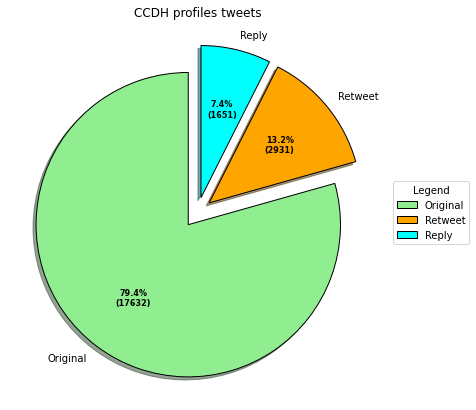

In [41]:
tweets_utils.print_pie_chart3("CCDH profiles tweets","Original","Retweet", "Reply",
      len(ccdh_original["created_at"]), len(ccdh_rt["created_at"]), len(ccdh_reply["created_at"]))

### URL investigation

In [43]:
ccdh_urls = [tweets_utils.url_decompress(v) if v != "[]" else "0" for v in ccdh_urls]
ccdh_urls = list(filter(lambda num: num != "0", ccdh_urls))
ccdh_urls = tweets_utils.remove_www(ccdh_urls)
ccdh_urls

['dlvr.it',
 'youtube.com',
 'foxnews.com',
 'twitter.com',
 'twitter.com',
 'twitter.com',
 'twitter.com',
 'foxnews.com',
 'channelnewsasia.com',
 'twitter.com',
 'twitter.com',
 'twitter.com',
 'twitter.com',
 'twitter.com',
 'twitter.com',
 'youtube.com',
 'twitter.com',
 'twitter.com',
 'nytimes.com',
 'twitter.com',
 'msn.com',
 'twitter.com',
 'twitter.com',
 'twitter.com',
 'twitter.com',
 'twitter.com',
 'twitter.com',
 'twitter.com',
 'twitter.com',
 'twitter.com',
 'forbes.com',
 'nytimes.com',
 'thehill.com',
 'twitter.com',
 'msn.com',
 'twitter.com',
 'twitter.com',
 'reuters.com',
 'twitter.com',
 'twitter.com',
 'twitter.com',
 'politifact.com',
 'politifact.com',
 'twitter.com',
 'twitter.com',
 'bariweiss.substack.com',
 'twitter.com',
 'twitter.com',
 'twitter.com',
 'spectator.co',
 'twitter.com',
 'twitter.com',
 'nytimes.com',
 'twitter.com',
 'yahoo.com',
 'twitter.com',
 'vox.com',
 'twitter.com',
 'twitter.com',
 'twitter.com',
 'twitter.com',
 'twitter.com',
 

In [1]:
val = pd.Series(ccdh_urls).value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='steelblue', fig=(14,14))
ax.set_title('Most original link shared', fontsize=14)
ax.invert_yaxis()
plt.show()

### New URLs
<a id="new_urls"/>

In [104]:
urls_useless = ["youtube.com", "google.com", "youtu.be", "ow.ly", "twitter.com"]

In [128]:
to_remove = []
result = ccdh_urls
val = 0
for i in credibility_url["Domain"]:
    for j in ccdh_urls:
        if j in i:
            to_remove.append(j)
            print(i)
            val = val + 1
x = len(ccdh_urls) - val
new_list = [i for i in result if i not in to_remove]
print(f"Missing urls: {x}")
new_list

In [106]:
for i in new_list:
    for j in urls_useless:
        if j in i:
            new_list.remove(i)

### Classification new domains
<a id="new_domain"/>

In [111]:
credib = []
credib.append("low") #petitions.whitehouse.gov
credib.append("low") #NaturalNews.com
credib.append("high") #heritage.org
credib.append("high") #tampabay.com
credib.append("low") #unherd.com
credib.append("low") #AskDrButtar.com
credib.append("high") #wsws.org
credib.append("low") #n5ti.com
credib.append("low") #theepochtimes.com
credib.append("high") #covipass.com
credib.append("low") #fort-russ.com
credib.append("high") #fiercepharma.com
credib.append("low") #tenthamendmentcenter.com
credib.append("low") #vigiliae.org
credib.append("low") #sun-sentinel.com
credib.append("high") #clinicaltrials.gov
credib.append("low") #Reason.com
credib.append("low") #childrenshealthdefense.org
credib.append("low") #AdvancedMedicineConference.com
credib.append("high") #aol.com
credib.append("low") #trendingpolitics.com
credib.append("low") #charityauctionstoday.com

In [115]:
df = pd.DataFrame(list(zip(new_list, credib)),
               columns =['Domain', 'Class'])

In [120]:
new_credibiliy = credibility_url.append(df, ignore_index=True)

In [123]:
new_credibiliy.to_csv("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/csv/domain_credibility.csv", index=False)

### Credibility
<a id="credibility"/>

In [2]:
importlib.reload(tweets_utils)
list_credibility = tweets_utils.check_credibility(ccdh_urls, credibility_url)

In [5]:
list_credibility

### Date tweets
<a id="dates" />

In [ ]:
date = []
for i in ccdh_tweets:
    date.append(tweets_utils.process_datetime(i))
    

In [72]:
fig = px.histogram(tweet_creation)
fig.update_layout(
    title_text='Daily tweets', # title of plot
    xaxis_title_text='Tweet', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.1, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)
fig.show()


### Network
<a id="network" />

In [ ]:
path = "C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/"
df_rt_ccdh = pd.read_csv(path + "ccdh_retweets.csv")

In [44]:
retweets_graph = nx.from_pandas_edgelist(df_rt_ccdh,'name','rt_name', create_using=nx.DiGraph())
print(nx.info(retweets_graph))

Name: 
Type: DiGraph
Number of nodes: 2545
Number of edges: 2743
Average in degree:   1.0778
Average out degree:   1.0778


In [45]:
isolated_nodes = list(nx.isolates(retweets_graph))
print('Isoleted nodes:',len(isolated_nodes))

Isoleted nodes: 0


In [46]:
print('Strongly connected: ',nx.is_strongly_connected(retweets_graph))

Strongly connected:  False


In [47]:
print('Number of connected components: ',nx.number_strongly_connected_components(retweets_graph))

Number of connected components:  2545


In [48]:
# Extract the giant connected component
Gcc = sorted((retweets_graph.subgraph(c) for c in nx.strongly_connected_components(retweets_graph)), key = len,reverse=True)[0]
print("Number of nodes in the Gcc graph: ")
print(len(Gcc.nodes()))
print("Number of edges in the Gcc graph: ")
print(len(Gcc.edges()))

Number of nodes in the Gcc graph: 
1
Number of edges in the Gcc graph: 
1


In [49]:
degrees = [val for (node, val) in retweets_graph.degree()]

print(f"The maximum degree of the Graph is {np.max(degrees)}")   
print(f"The minimum degree of the Graph is {np.min(degrees)}")

out_degrees = [val for (node, val) in retweets_graph.out_degree()]

print(f"The maximum out_degree of the Graph is {np.max(out_degrees)}")   
print(f"The minimum out_degree of the Graph is {np.min(out_degrees)}")

in_degrees = [val for (node, val) in retweets_graph.in_degree()]

print(f"The maximum in_degree of the Graph is {np.max(in_degrees)}")   
print(f"The minimum in_degree of the Graph is {np.min(in_degrees)}")

The maximum degree of the Graph is 1276
The minimum degree of the Graph is 1
The maximum out_degree of the Graph is 5
The minimum out_degree of the Graph is 0
The maximum in_degree of the Graph is 1275
The minimum in_degree of the Graph is 0


In [50]:
density = nx.density(retweets_graph)
print("Network density:", density)

Network density: 0.00042366336756002025


In [51]:
degree_dict = dict(retweets_graph.degree(retweets_graph.nodes()))
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

In [52]:
n=5
print("Top n nodes by degree:")
for d in sorted_degree[:n]:
    print(f"the node with name {d[0]} , has a degree of {d[1]}")

Top n nodes by degree:
the node with name BusyDrT , has a degree of 1276
the node with name RobertKennedyJr , has a degree of 581
the node with name DrButtar , has a degree of 417
the node with name mercola , has a degree of 269
the node with name unhealthytruth , has a degree of 178


In [53]:
in_degree_dict = dict(retweets_graph.in_degree(retweets_graph.nodes()))
sorted_in_degree = sorted(in_degree_dict.items(), key=itemgetter(1), reverse=True)

In [54]:
n=5
print("Top n nodes by in_degree:")
for d in sorted_in_degree[:n]:
    print(f"the node with name {d[0]} , has a in-degree of {d[1]}")

Top n nodes by in_degree:
the node with name BusyDrT , has a in-degree of 1275
the node with name RobertKennedyJr , has a in-degree of 580
the node with name DrButtar , has a in-degree of 417
the node with name mercola , has a in-degree of 269
the node with name unhealthytruth , has a in-degree of 177


In [55]:
out_degree_dict = dict(retweets_graph.out_degree(retweets_graph.nodes()))
sorted_out_degree = sorted(out_degree_dict.items(), key=itemgetter(1), reverse=True)

In [56]:
n=5
print("Top n nodes by out_degree:")
for d in sorted_out_degree[:n]:
    print(f"the node with name {d[0]} , has a out-degree of {d[1]}")

Top n nodes by out_degree:
the node with name patriot7842 , has a out-degree of 5
the node with name BarryB911 , has a out-degree of 4
the node with name frLarousse2 , has a out-degree of 4
the node with name dad_liams , has a out-degree of 3
the node with name mother_verge , has a out-degree of 3


In [57]:
graph_centrality = nx.degree_centrality(retweets_graph)
max_de = max(graph_centrality.items(), key=itemgetter(1))
graph_closeness = nx.closeness_centrality(retweets_graph)
max_clo = max(graph_closeness.items(), key=itemgetter(1))
graph_betweenness = nx.betweenness_centrality(retweets_graph, normalized=True, endpoints=False)
max_bet = max(graph_betweenness.items(), key=itemgetter(1))

print(f"the node with id {max_de[0]} has a degree centrality of {max_de[1]:.2f} which is the maximum of the Graph")
print(f"the node with id {max_clo[0]} has a closeness centrality of {max_clo[1]:.2f} which is the maximum of the Graph")
print(f"the node with id {max_bet[0]} has a betweenness centrality of {max_bet[1]:.2f} which is the maximum of the Graph")

the node with id BusyDrT has a degree centrality of 0.50 which is the maximum of the Graph
the node with id BusyDrT has a closeness centrality of 0.50 which is the maximum of the Graph
the node with id kevdjenkins1 has a betweenness centrality of 0.00 which is the maximum of the Graph


In [58]:
#pageRank centrality for each node
pagerank_centr = nx.pagerank(retweets_graph)

#### Communities with Louvain modularity

In [59]:
retweets_graph_und = nx.from_pandas_edgelist(df_rt_ccdh,'name','rt_name')
print(nx.info(retweets_graph_und))

Name: 
Type: Graph
Number of nodes: 2545
Number of edges: 2743
Average degree:   2.1556


In [60]:
best_part = cm.best_partition(retweets_graph_und, random_state=42)

In [61]:
size = float(len(set(best_part.values())))
print("Number of communities: ", size)

Number of communities:  7.0


In [62]:
#check that sum of each community size = number of nodes
communities_size = np.zeros(len(set(best_part.values())))
for v in list(best_part.values()):
    communities_size[v] +=1
print(sum(communities_size))

2545.0


In [63]:
print("Louvain Modularity: ",cm.modularity(best_part, retweets_graph_und))

Louvain Modularity:  0.6489055294562808


In [6]:
# color the nodes according to their partition
pos = nx.spring_layout(retweets_graph_und)

plt.figure(figsize=(10,10)) 
cmap = mcm.get_cmap('viridis', max(best_part.values()) + 1)
shapes = 'so^>v<dph8'
shapes_iter = 0
for node, color in best_part.items():
    nx.draw_networkx_nodes(retweets_graph_und, pos, [node], node_size=40,
                           node_color=[cmap.colors[color]],
                           node_shape=shapes[shapes_iter])
    shapes_iter +=1
    if shapes_iter == len(shapes):
        shapes_iter=0
nx.draw_networkx_edges(retweets_graph_und, pos, alpha=0.5)
#plt.savefig('plots/communities')
plt.show() #add labels

#### Communities with Leiden

In [65]:
tuples = [tuple(x) for x in df_rt_ccdh.values]
retweets_graph = ig.Graph.TupleList(tuples, directed = True)

In [66]:
n_vertices = retweets_graph.vcount()
print("Number of vertices:", n_vertices)
print("Number of edges:", retweets_graph.ecount())
print("Density of the graph:", 2*retweets_graph.ecount()/(retweets_graph.vcount()*(retweets_graph.vcount()-1)))

Number of vertices: 5085
Number of edges: 3529
Density of the graph: 0.00027301414892538876


In [67]:
total_degree=0
total_indegree = 0
total_outdegree = 0
for n in range(n_vertices):
    total_degree += retweets_graph.degree(n)
    total_indegree += retweets_graph.indegree(n)
    total_outdegree += retweets_graph.outdegree(n)
print("Average indegree:", total_indegree/n_vertices)
print("Average indegree:", total_outdegree/n_vertices)

Average indegree: 0.6940019665683382
Average indegree: 0.6940019665683382


In [68]:
partition = la.find_partition(retweets_graph, la.ModularityVertexPartition)
partition

In [69]:
retweets_graph.vs[0]['name']

1.104759620495704e+18

In [70]:
retweets_graph.vs()["name"]

[1.104759620495704e+18,
 'Exvaxxer_Mommy',
 1.0559308951259382e+18,
 'patriot7842',
 22822556.0,
 'dihoppy',
 41821282.0,
 'liteseeker',
 715082513.0,
 'Heidi559Heidi',
 18093097.0,
 'unhealthytruth',
 707224081.0,
 'CarolynRude',
 1147408314.0,
 'Samm_LM',
 79789868.0,
 'monis1013',
 494684963.0,
 'janeausten1961',
 8.210219462845604e+17,
 'argounova',
 3403248579.0,
 'VeritasDolor',
 1.1665387983957975e+18,
 'Ashleywarrior12',
 7.589716312932147e+17,
 'GreySouthwick',
 9.003649825708442e+17,
 'JMctalk',
 7.751370937733652e+17,
 'ReussMichele',
 735101078.0,
 'TheGalvinGang',
 4829675178.0,
 'jimbarrack',
 2312879312.0,
 'atruthdetective',
 275397354.0,
 'nakatsu28',
 74927053.0,
 'enemama',
 2742039033.0,
 'davelikestorave',
 3301042497.0,
 'MariMagforever',
 4215316033.0,
 'wakeup_patriot',
 1.1386194576711803e+18,
 'Elizabe07423174',
 1.2026151773608714e+18,
 'KarinaRa1776',
 2409506407.0,
 'Athbheochan',
 24861271.0,
 'katedish',
 1.0958948112387809e+18,
 'AdiMano2',
 56569304.0,


In [71]:
partition.membership

[1,
 1,
 2,
 2,
 3,
 3,
 4,
 4,
 5,
 5,
 6,
 6,
 7,
 7,
 8,
 8,
 9,
 9,
 10,
 10,
 11,
 11,
 12,
 12,
 13,
 13,
 14,
 14,
 15,
 15,
 16,
 16,
 17,
 17,
 18,
 18,
 19,
 19,
 20,
 20,
 21,
 21,
 22,
 22,
 23,
 23,
 24,
 24,
 25,
 25,
 26,
 26,
 27,
 27,
 28,
 28,
 29,
 29,
 30,
 30,
 31,
 31,
 32,
 32,
 33,
 33,
 34,
 34,
 35,
 35,
 36,
 36,
 37,
 37,
 38,
 38,
 39,
 39,
 40,
 40,
 41,
 41,
 42,
 42,
 43,
 43,
 44,
 44,
 45,
 45,
 46,
 46,
 47,
 47,
 48,
 48,
 49,
 49,
 50,
 50,
 51,
 51,
 52,
 52,
 53,
 53,
 54,
 54,
 55,
 55,
 56,
 56,
 57,
 57,
 58,
 58,
 59,
 59,
 60,
 60,
 61,
 61,
 62,
 62,
 63,
 63,
 64,
 64,
 65,
 65,
 66,
 66,
 67,
 67,
 68,
 68,
 69,
 69,
 70,
 70,
 71,
 71,
 72,
 72,
 73,
 73,
 74,
 74,
 75,
 75,
 76,
 76,
 77,
 77,
 78,
 78,
 79,
 79,
 80,
 80,
 81,
 81,
 82,
 82,
 83,
 83,
 84,
 84,
 85,
 85,
 86,
 86,
 87,
 87,
 88,
 88,
 89,
 89,
 90,
 90,
 91,
 91,
 92,
 92,
 93,
 93,
 94,
 94,
 95,
 95,
 96,
 96,
 97,
 97,
 98,
 98,
 99,
 99,
 100,
 100,
 101,
 101,
 102

In [72]:
zip_iterator = zip(retweets_graph.vs()["name"], partition.membership)
best_part = dict(zip_iterator)
best_part

{1.104759620495704e+18: 1,
 'Exvaxxer_Mommy': 1,
 1.0559308951259382e+18: 2,
 'patriot7842': 2,
 22822556.0: 3,
 'dihoppy': 3,
 41821282.0: 4,
 'liteseeker': 4,
 715082513.0: 5,
 'Heidi559Heidi': 5,
 18093097.0: 6,
 'unhealthytruth': 6,
 707224081.0: 7,
 'CarolynRude': 7,
 1147408314.0: 8,
 'Samm_LM': 8,
 79789868.0: 9,
 'monis1013': 9,
 494684963.0: 10,
 'janeausten1961': 10,
 8.210219462845604e+17: 11,
 'argounova': 11,
 3403248579.0: 12,
 'VeritasDolor': 12,
 1.1665387983957975e+18: 13,
 'Ashleywarrior12': 13,
 7.589716312932147e+17: 14,
 'GreySouthwick': 14,
 9.003649825708442e+17: 15,
 'JMctalk': 15,
 7.751370937733652e+17: 16,
 'ReussMichele': 16,
 735101078.0: 17,
 'TheGalvinGang': 17,
 4829675178.0: 18,
 'jimbarrack': 18,
 2312879312.0: 19,
 'atruthdetective': 19,
 275397354.0: 20,
 'nakatsu28': 20,
 74927053.0: 21,
 'enemama': 21,
 2742039033.0: 22,
 'davelikestorave': 22,
 3301042497.0: 23,
 'MariMagforever': 23,
 4215316033.0: 24,
 'wakeup_patriot': 24,
 1.1386194576711803e+

### Botometer Score
<a id="botometer_score"/>